This notebook assumes you have already followed the steps in `README.md`. If not, do that first!

In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
import argparse
import math
import numpy as np
import os

In [48]:
tf.enable_eager_execution()

# Show example of images

In [49]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('../droughtwatch/data/val/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B2': tf.FixedLenFeature([], tf.string),
        'B3': tf.FixedLenFeature([], tf.string),
        'B4': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

In [72]:
training_files[0]

'../droughtwatch/data/val/part-r-00038'

In [65]:
type(parsed_examples)

list

In [69]:
type(parsed_examples[0])

dict

In [71]:
parsed_examples[0].keys()

dict_keys(['B2', 'B3', 'B4', 'label'])

In [50]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

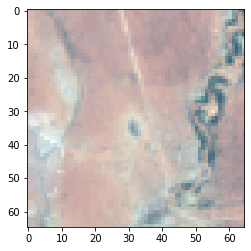

In [73]:
img, label = get_img_from_example(parsed_examples[13])
plt.imshow(img)

In [75]:
img.shape

(65, 65, 3)

In [52]:
img.std()

21.66793237450417

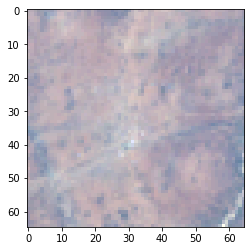

In [53]:
parsed_examples[16]
img, label = get_img_from_example(parsed_examples[16])
plt.imshow(img)

In [54]:
img.std()

14.77316032452744

<ipython-input-56-68551c9da741>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


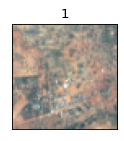

In [56]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(12,13):
    plt.subplot(10, 10, i)
    img, label = get_img_from_example(parsed_examples[i])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()

In [57]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('../droughtwatch/data/val/')

def parse_visual(data):
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)

    features = {
        'B2': tf.io.FixedLenFeature([], tf.string),
        'B3': tf.io.FixedLenFeature([], tf.string),
        'B4': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.io.parse_single_example(data, features) for data in iterator]
    return parsed_examples

parsed_examples = parse_visual(training_files[0])

In [15]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

<ipython-input-60-4866bb9c4213>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


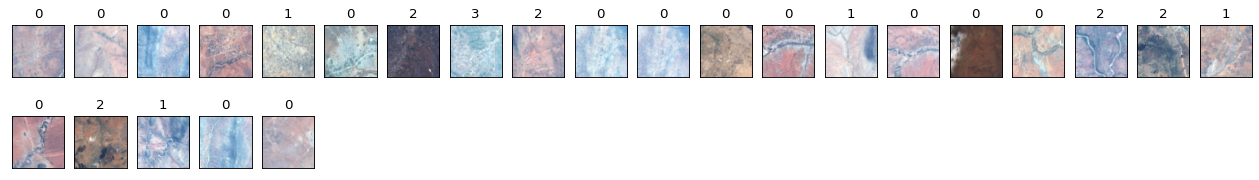

In [60]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(1,26):
    plt.subplot(20, 20, i)
    img, label = get_img_from_example(parsed_examples[i+15])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()

# Load images from data folder

In [17]:
def file_list_from_folder(folder, data_path):
  folderpath = os.path.join(data_path, folder)
  filelist = []
  for filename in os.listdir(folderpath):
    if filename.startswith('part-') and not filename.endswith('gstmp'):
      filelist.append(os.path.join(folderpath, filename))
  return filelist

In [19]:
train = file_list_from_folder("train", "../droughtwatch/data/")
val = file_list_from_folder("val", '../droughtwatch/data/')

In [30]:
features = {
  'B1': tf.io.FixedLenFeature([], tf.string),
  'B2': tf.io.FixedLenFeature([], tf.string),
  'B3': tf.io.FixedLenFeature([], tf.string),
  'B4': tf.io.FixedLenFeature([], tf.string),
  'B5': tf.io.FixedLenFeature([], tf.string),
  'B6': tf.io.FixedLenFeature([], tf.string),
  'B7': tf.io.FixedLenFeature([], tf.string),
  'B8': tf.io.FixedLenFeature([], tf.string),
  'B9': tf.io.FixedLenFeature([], tf.string),
  'B10': tf.io.FixedLenFeature([], tf.string),
  'B11': tf.io.FixedLenFeature([], tf.string),
  'label': tf.io.FixedLenFeature([], tf.int64),
}     

In [105]:
def parse_tfrecords(filelist, batch_size, buffer_size, include_viz=False):
  # try a subset of possible bands
  def _parse_(serialized_example, keylist=['B1','B4', 'B3', 'B2', 'B5', 'B6', 'B7', 'B8','B9','B10']):
    example = tf.io.parse_single_example(serialized_example, features)
    
    def getband(example_key):
      img = tf.io.decode_raw(example_key, tf.uint8)
      return tf.reshape(img[:IMG_DIM**2], shape=(IMG_DIM, IMG_DIM, 1))
    
    bandlist = [getband(example[key]) for key in keylist]
    # combine bands into tensor
    image = tf.concat(bandlist, -1)

    # one-hot encode ground truth labels 
    label = tf.cast(example['label'], tf.int32)
    label = tf.one_hot(label, NUM_CLASSES)
   
    # if logging RGB images as examples, generate RGB image from 11-channel satellite image
    if include_viz:
      image = get_img_from_example(example)
      return {'image' : image, 'label': example['label']}, label
    return {'image': image}, label
    
  tfrecord_dataset = tf.data.TFRecordDataset(filelist) 
  tfrecord_dataset = tfrecord_dataset.map(lambda x:_parse_(x)).shuffle(buffer_size).repeat(-1).batch(batch_size)
  tfrecord_iterator = tfrecord_dataset.make_one_shot_iterator()
  image, label = tfrecord_iterator.get_next()
  return image, label

In [93]:
NUM_TRAIN = 16000
NUM_VAL = 3200
IMG_DIM = 65
NUM_CLASSES = 4
TOTAL_TRAIN = 40000
TOTAL_VAL = 10778
TOTAL_TRAIN2 = 86317
TOTAL_VAL2 = 10778

In [107]:
def load_data(data_path):
  train = file_list_from_folder("train", data_path)
  val = file_list_from_folder("val", data_path)
  return train, val

In [108]:
train_tfrecords, val_tfrecords = load_data("../droughtwatch/data/")

In [109]:
train_images, train_labels = parse_tfrecords(train_tfrecords, TOTAL_TRAIN, TOTAL_TRAIN)
val_images, val_labels = parse_tfrecords(val_tfrecords, TOTAL_VAL, TOTAL_VAL)
  

In [110]:
type(train_images)

dict

In [111]:
train_images['image'].shape

TensorShape([40000, 65, 65, 10])

In [112]:
img33 = train_images['image'][33].numpy()

In [113]:
img33 = img33[:,:,1:4]

In [159]:
def transform_image_torgb(image):
    return image[:,:,1:4]

In [160]:
#for reference only
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

In [166]:
def plot_image(img_nb, train_images):
    new_img_array = np.zeros((65,65,3), 'uint8')
    img_rgb = transform_image_torgb(train_images['image'][img_nb]).numpy()
    for i, band in enumerate(['B4', 'B3', 'B2']): #B4, B3, B2 for our reference
        img_rgb = img_rgb.reshape(65, 65)
        img_rgb = img_rgb / np.max(img_rgb)*255
        new_img_array[...,i] = img_rgb
    return plt.imshow(img_rgb)

In [167]:
plot_image(22,train_images)

ValueError: cannot reshape array of size 12675 into shape (65,65)

In [161]:
for i, band in enumerate(['B4', 'B3', 'B2']):
    print(i, band)

0 B4
1 B3
2 B2


In [158]:
train_images['image'][0][:,:,1]

TensorShape([65, 65])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


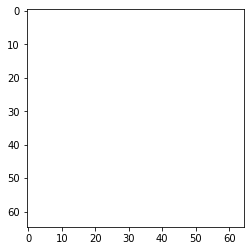

In [154]:
plot_image(24,train_images)

In [149]:
np.unique(train_images['image'][22])

array([  0,   1,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 195, 196, 197, 198,
       199, 200, 201, 202, 203, 204, 205, 206, 207, 208], dtype=uint8)

In [79]:
type(train_labels)

tensorflow.python.framework.ops.EagerTensor

In [36]:
def initialize_model4():
    from tensorflow.keras import layers, initializers
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(65, 65, 7), name='image'))
    model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
    model.add(layers.Conv2D(64, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
    model.add(layers.Conv2D(filters=128, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    # set up optimizer
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    return model

In [37]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [38]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


# Data augmentation
To easily improve the accuracy of a model without much work, we can generate new data: the data augmentation. This widely used technique consists in applying little transformation to input images without changing its label, as mirroring, cropping, intensity changes, etc. The improved performance simply results from the Neural network training with more different data.

The natural way to generate these new images is to apply some transformations and train the model on the original and new images. However, such procedure requires to keep all these images in memory : it can be very intensive, to the point that your computer memory cannot hold any new image (your computer might even crash).

For this reason, we will augment the data on the fly, meaning that we will create new data, use them to fit the model, then delete them. Here, Keras is our friend as it provides the utils to do all this job for us. Look at the following code : the general writing can seem odd but don't be panicked: just look at the function arguments that defines the augmentation techniques that we will use and that you can check in the documentation.

In [39]:
# The data generator
X_tr = train_images["image"][:30000]
y_tr = train_labels[:30000]
X_val = train_images["image"][30000:]
y_val = train_labels[30000:]

In [40]:
X_tr.shape

TensorShape([30000, 65, 65, 7])

In [41]:
indices = np.where([i[i.std() >= 10].all() for i in X_tr.numpy()])
X_tr, y_tr = X_tr.numpy(), y_tr.numpy()
X_tr, y_tr = X_tr[indices], y_tr[indices]

In [42]:
indices = np.where([i[i.std() >= 10].all() for i in X_val.numpy()])
X_val, y_val = X_val.numpy(), y_val.numpy()
X_val, y_val = X_val[indices], y_val[indices]

In [43]:
X_tr.shape

(29933, 65, 65, 7)

In [27]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center=False,
#     featurewise_std_normalization=False,
#     rotation_range=10,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     zoom_range=(0.8, 1.2),) 

# datagen.fit(train_images["image"])

In [28]:
# The model
#train_flow = datagen.flow(X_tr, y_tr, batch_size=32)
model = initialize_model4()
model = compile_model(model)
from tensorflow.keras.callbacks import EarlyStopping
# The early stopping criterion
es = EarlyStopping(patience=20, restore_best_weights = True, verbose = 1)

# The fit
# history_2 = model.fit(train_flow, 
#                         epochs=1000, 
#                         callbacks=[es], 
#                         validation_data=(X_val, y_val), batch_size = 32)
history_2 = model.fit(X_tr,y_tr, 
                        epochs=1000, 
                        callbacks=[es], 
                        validation_data=(X_val, y_val), batch_size = 32)


Epoch 1/1000
503/936 [===============>..............] - ETA: 50s - loss: 1.0455 - accuracy: 0.6103

KeyboardInterrupt: 

In [29]:
X_test = val_images["image"].numpy()
print(X_test.shape)
y_test = val_labels.numpy()
indices = np.where([i[i.std() >= 10].all() for i in X_test])
X_test, y_test = X_test[indices], y_test[indices]
print(X_test.shape)

(10778, 65, 65, 7)
(10753, 65, 65, 7)


In [ ]:

plot_history(history_2)
plt.show()
res = model.evaluate(X_test, y_test, verbose=1)

print(f'The accuracy is of {res[1]*100:.3f}%')

In [ ]:
X_tr.shape

In [ ]:
X_trrgb = X_tr[:,:,:,2:5]
X_trrgb.shape

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():
    model = VGG16(weights="imagenet", include_top=False, input_shape=X_trrgb[0].shape)
    return model

In [ ]:
model2 = load_model()
model2.summary()

In [38]:
def set_nontrainable_layers(model):
    # Set the first layers to be untrainable
    model.trainable = False
    
    return model

model2 = set_nontrainable_layers(model)

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        928       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        8256      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       3

In [39]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(4, activation='softmax')
    
    
    model = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])
    
    return model

In [40]:
model2 = add_last_layers(model2)


In [41]:
def compile_model(model):
    
    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [43]:
def build_model():
    
    model = load_model()
    model = add_last_layers(model)
    model = compile_model(model)
    
    return model

model2 = build_model()

In [31]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X_trrgb = X_tr[:,:,:,2:5]
X_valrgb = X_val[:,:,:,2:5]
X_testrgb = X_test[:,:,:,2:5]
X_train = preprocess_input(X_trrgb) 
X_val = preprocess_input(X_valrgb)
X_test = preprocess_input(X_testrgb)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)

history = model2.fit(X_train, y_tr, 
                    validation_data=(X_val, y_val), 
                    epochs=1000, 
                    batch_size=32, 
                    callbacks=[es],verbose = 1)

In [ ]:
plot_history(history)
plt.show()


In [ ]:
res = model2.evaluate(X_test, y_test, verbose=1)

print(f'The accuracy is of {res[1]*100:.3f}%')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5, 1.),
    zoom_range=(0.5, 1.2))


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_trrgb)

model_data_aug = build_model()

train_flow = datagen.flow(X_trrgb, y_tr, batch_size=16)
val_flow = datagen.flow(X_valrgb, y_val, batch_size=16)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=20, verbose=1, restore_best_weights=True)
history_data_aug = model_data_aug.fit_generator(train_flow, epochs=1000, validation_data=val_flow, callbacks=[es])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
1872/1872 [==============================] - 560s 299ms/step - loss: 2.4477 - accuracy: 0.5214 - val_loss: 1.7348 - val_accuracy: 0.5797
Epoch 2/1000
1872/1872 [==============================] - 577s 308ms/step - loss: 1.4332 - accuracy: 0.5588 - val_loss: 1.2388 - val_accuracy: 0.5941
Epoch 3/1000
1872/1872 [==============================] - 568s 304ms/step - loss: 1.1204 - accuracy: 0.5917 - val_loss: 1.0783 - val_accuracy: 0.5955
Epoch 4/1000
1872/1872 [==============================] - 585s 313ms/step - loss: 1.0101 - accuracy: 0.6150 - val_loss: 0.9883 - val_accuracy: 0.6194
Epoch 5/1000
1872/1872 [==============================] - 611s 327ms/step - loss: 0.9654 - accuracy: 0.6307 - val_loss: 0.9687 - val_accuracy: 0.6361
Epoch 6/1000
1872/1872 [==============================] - 671s 358ms/step - loss: 0.9484 - accuracy: 0.6356 - val_loss: 0.9517 - val_accuracy: 0.6391
Epoch 7/1000
1872/1872 [

In [ ]:
res = model_data_aug.evaluate(X_testrgb, y_test, verbose=1)

print(f'The accuracy is of {res[1]*100:.3f}%')

In [ ]:
plot_history(history_data_aug)

In [ ]:
# serialize model to JSON
model_json = model_data_aug.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_data_aug.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_testrgb, y_test, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
